# 5. Feature Engineering

Tasks to perform:

5.1. Data normalization/transformation  
5.2. Compute Acoustic & Topical Typicality  

In [1]:
# import modules
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read data
songs_df = pd.read_csv('Data/spotify_sg_topics_5.csv')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   song_id               1629 non-null   object 
 1   popularity            1629 non-null   float64
 2   title                 1629 non-null   object 
 3   artist                1629 non-null   object 
 4   album/single          1629 non-null   object 
 5   artist_followers      1629 non-null   int64  
 6   explicit              1629 non-null   int64  
 7   album                 1629 non-null   object 
 8   release_date          1629 non-null   object 
 9   danceability          1629 non-null   float64
 10  energy                1629 non-null   float64
 11  key                   1629 non-null   int64  
 12  loudness              1629 non-null   float64
 13  mode                  1629 non-null   int64  
 14  speechiness           1629 non-null   float64
 15  acousticness         

In [3]:
songs_df.head()

song_id  popularity                 title  \
0  5xhJmd0I15jFcEdqxfCzKk       914.6       it wont kill ya   
1  0wJJhRgdHhT93Z3iWdMB0T        45.6                  hymn   
2  7nAfXgeHfDO50upcOjJOaq       935.7     talking to myself   
3  0kN8xEmgMW9mh7UmDYHlJP     46293.6  versace on the floor   
4  4PkIDTPGedm0enzdvilLNd      5227.4               sixteen   

                      artist album/single  artist_followers  explicit  \
0  The Chainsmokers - Louane        album          16931568         0   
1                      Kesha       single           5910376         0   
2                Linkin Park        album          17132813         0   
3                 Bruno Mars        album          27355260         0   
4             Ellie Goulding       single           8604850         0   

                    album release_date  danceability  ...  \
0  Memories...Do Not Open   2017-04-07         0.572  ...   
1                    Hymn   2017-08-03         0.488  ...   
2          One More Light   2017-05-19         0.593  ...   
3               24K Magic   2016-11-17         0.578  ...   
4                 Sixteen   2019-04-12         0.669  ...   

                                         tokens_desc  topic_no  \
0                               much, little, longer       5.0   
1  quite, pretty, reckless, pretty, wild, front, ...       5.0   
2                                                NaN       5.0   
3                      alone, inside, right, anymore       2.0   
4                        small, suddenly, busy, good       5.0   

   topic_perc_contrib                                           keywords  \
0              0.9746   know,  like,  love,  got,  time,  get,  see, ...   
1              0.9838   know,  like,  love,  got,  time,  get,  see, ...   
2              0.8559   know,  like,  love,  got,  time,  get,  see, ...   
3              0.9753   know,  let,  like,  one,  love,  need,  could...   
4              0.8167   know,  like,  love,  got,  time,  get,  see, ...   

   topic_weatlh  topic_anger  topic_uncertain_love  topic_hope  topic_sadness  \
0           0.0     0.000000              0.000000         0.0            0.0   
1           0.0     0.000000              0.000000         0.0            0.0   
2           0.0     0.118165              0.000000         0.0            0.0   
3           0.0     0.000000              0.975335         0.0            0.0   
4           0.0     0.000000              0.164689         0.0            0.0   

   topic_romantic_love  
0             0.974564  
1             0.983800  
2             0.855965  
3             0.000000  
4             0.816677  

[5 rows x 38 columns]

In [4]:
# log tranform features with large numbers
songs_df['artist_followers_norm'] = np.log(songs_df['artist_followers'])
songs_df['days_since_release_norm'] = np.log(songs_df['days_since_release'])

In [5]:
# separate topic df and acoustic_df
topic_cols = [col for col in songs_df.columns if 'topic' in col and col not in ['topic_no', 'topic_perc_contrib', 'lda_topic']]
acoustic_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode']
add_cols = ['song_id', 'genre']

topic_cols = topic_cols + add_cols 
acoustic_cols = acoustic_cols + add_cols 

topics_df = songs_df[topic_cols]
acoustic_df = songs_df[acoustic_cols]

print(topic_cols)
print(acoustic_cols)

['topic_weatlh', 'topic_anger', 'topic_uncertain_love', 'topic_hope', 'topic_sadness', 'topic_romantic_love', 'song_id', 'genre']
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'song_id', 'genre']


In [6]:
# min-max normalisation 
def normalise_df(df):
    norm_df = df.set_index(['song_id', 'genre'])
    norm_df = norm_df.dropna()
    norm_df = (norm_df-norm_df.min())/(norm_df.max()-norm_df.min())
    norm_df = norm_df.add_suffix('_norm')
    norm_df = norm_df.reset_index()
    return norm_df

In [7]:
# min-max normalise acoustic and topic compositions features

norm_topics_df = normalise_df(topics_df)
norm_acoustic_df = normalise_df(acoustic_df)

In [8]:
# merge normed cols to og df

full_songs_df = songs_df.merge(right=norm_acoustic_df,
                                    how='left',
                                    on=['song_id', 'genre'])\
                        .merge(right=norm_topics_df,
                                    how='left',
                                    on=['song_id', 'genre'])
                            
                                        
# full_songs_df = full_songs_df.drop(columns='Unnamed: 0')
full_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1629 entries, 0 to 1628
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   song_id                    1629 non-null   object 
 1   popularity                 1629 non-null   float64
 2   title                      1629 non-null   object 
 3   artist                     1629 non-null   object 
 4   album/single               1629 non-null   object 
 5   artist_followers           1629 non-null   int64  
 6   explicit                   1629 non-null   int64  
 7   album                      1629 non-null   object 
 8   release_date               1629 non-null   object 
 9   danceability               1629 non-null   float64
 10  energy                     1629 non-null   float64
 11  key                        1629 non-null   int64  
 12  loudness                   1629 non-null   float64
 13  mode                       1629 non-null   int64

In [9]:
# group topic cols by genre
topic_by_genre_df = norm_topics_df.groupby('genre').mean()
topic_by_genre_df

topic_weatlh_norm  topic_anger_norm  \
genre                                                   
boy band                   0.052644          0.034853   
dance/electronic           0.078098          0.063813   
hip hop                    0.269557          0.150277   
house                      0.041164          0.048488   
indie                      0.100646          0.098587   
metal                      0.049435          0.099693   
pop                        0.077749          0.080981   
r&b/soul                   0.078236          0.061647   
rap                        0.279075          0.144303   
rock                       0.115125          0.165571   

                  topic_uncertain_love_norm  topic_hope_norm  \
genre                                                          
boy band                           0.116047         0.075667   
dance/electronic                   0.190757         0.022201   
hip hop                            0.118539         0.029694   
house                              0.241455         0.035644   
indie                              0.253058         0.014942   
metal                              0.338282         0.018888   
pop                                0.178675         0.043039   
r&b/soul                           0.216556         0.033726   
rap                                0.130406         0.061860   
rock                               0.215605         0.073240   

                  topic_sadness_norm  topic_romantic_love_norm  
genre                                                           
boy band                    0.054063                  0.655775  
dance/electronic            0.022058                  0.610549  
hip hop                     0.041140                  0.385324  
house                       0.036116                  0.580886  
indie                       0.032438                  0.486058  
metal                       0.138874                  0.336694  
pop                         0.056689                  0.551304  
r&b/soul                    0.054357                  0.542814  
rap                         0.040902                  0.333971  
rock                        0.049436                  0.368177

In [10]:
# group acoustic cols by genre
acoustic_by_genre_df = norm_acoustic_df.groupby('genre').mean()
acoustic_by_genre_df

danceability_norm  energy_norm  loudness_norm  \
genre                                                             
boy band                   0.594687     0.639439       0.613260   
dance/electronic           0.584573     0.673661       0.593759   
hip hop                    0.702812     0.582168       0.502220   
house                      0.527023     0.695239       0.621143   
indie                      0.478519     0.586407       0.506885   
metal                      0.457716     0.774148       0.609083   
pop                        0.584279     0.597428       0.554650   
r&b/soul                   0.553490     0.508632       0.459949   
rap                        0.643844     0.579952       0.564059   
rock                       0.504589     0.650179       0.565441   

                  speechiness_norm  acousticness_norm  instrumentalness_norm  \
genre                                                                          
boy band                  0.107135           0.167959               0.000018   
dance/electronic          0.143948           0.171413               0.036142   
hip hop                   0.403278           0.177168               0.017709   
house                     0.096261           0.160556               0.015097   
indie                     0.105496           0.261267               0.021722   
metal                     0.125112           0.082952               0.003450   
pop                       0.174487           0.237652               0.006493   
r&b/soul                  0.177764           0.347104               0.051025   
rap                       0.283024           0.213091               0.006659   
rock                      0.088337           0.138690               0.040484   

                  liveness_norm  valence_norm  tempo_norm  duration_ms_norm  \
genre                                                                         
boy band               0.203418      0.542010    0.424731          0.457117   
dance/electronic       0.225267      0.431494    0.388329          0.503794   
hip hop                0.287136      0.398566    0.437748          0.503110   
house                  0.272751      0.423687    0.433102          0.431106   
indie                  0.263276      0.346187    0.415786          0.598757   
metal                  0.280893      0.437869    0.406985          0.515605   
pop                    0.249426      0.471433    0.394174          0.470603   
r&b/soul               0.236801      0.381443    0.364064          0.519509   
rap                    0.253381      0.388850    0.480456          0.412281   
rock                   0.215134      0.421170    0.451166          0.559792   

                  mode_norm  
genre                        
boy band           0.714286  
dance/electronic   0.558824  
hip hop            0.630952  
house              0.500000  
indie              0.647059  
metal              0.687500  
pop                0.609339  
r&b/soul           0.530864  
rap                0.496644  
rock               0.779661

In [11]:
# get avg genre similarity
from sklearn.metrics.pairwise import cosine_similarity

def get_sim_df(grouped_df):
    genre_sim_matrix = cosine_similarity(grouped_df)
    genre_sim_df = pd.DataFrame(genre_sim_matrix, 
                                columns=grouped_df.index.values, 
                                index=grouped_df.index) \
                                .reset_index()

    # get avg_typicality
    genre_sim_df = genre_sim_df.set_index('genre')
    return genre_sim_df

In [12]:
# get avg genre similarity of topic and acoustic composition

topic_avg_sim_df = get_sim_df(topic_by_genre_df)
acoustic_avg_sim_df = get_sim_df(acoustic_by_genre_df)

acoustic_avg_sim_df

boy band  dance/electronic   hip hop     house     indie  \
genre                                                                        
boy band          1.000000          0.991819  0.968185  0.986624  0.980097   
dance/electronic  0.991819          1.000000  0.976503  0.995398  0.985444   
hip hop           0.968185          0.976503  1.000000  0.962584  0.966355   
house             0.986624          0.995398  0.962584  1.000000  0.977208   
indie             0.980097          0.985444  0.966355  0.977208  1.000000   
metal             0.986294          0.988878  0.957671  0.988694  0.981015   
pop               0.994513          0.995486  0.982823  0.988831  0.987391   
r&b/soul          0.974230          0.982727  0.977559  0.970726  0.988399   
rap               0.976288          0.986372  0.990496  0.982486  0.968781   
rock              0.990920          0.986156  0.961946  0.978731  0.990896   

                     metal       pop  r&b/soul       rap      rock  
genre                                                               
boy band          0.986294  0.994513  0.974230  0.976288  0.990920  
dance/electronic  0.988878  0.995486  0.982727  0.986372  0.986156  
hip hop           0.957671  0.982823  0.977559  0.990496  0.961946  
house             0.988694  0.988831  0.970726  0.982486  0.978731  
indie             0.981015  0.987391  0.988399  0.968781  0.990896  
metal             1.000000  0.982211  0.958935  0.963738  0.991097  
pop               0.982211  1.000000  0.990482  0.988965  0.985609  
r&b/soul          0.958935  0.990482  1.000000  0.980818  0.970855  
rap               0.963738  0.988965  0.980818  1.000000  0.963170  
rock              0.991097  0.985609  0.970855  0.963170  1.000000

In [13]:
# calc raw pairwise similarity

def calc_pw_similarity(feature_df):

    sim_df = feature_df.set_index(['song_id', 'genre'])

    sim_matrix = cosine_similarity(sim_df)
    raw_sim_df = pd.DataFrame(sim_matrix, columns=sim_df.index.values, index=sim_df.index)\
                    .reset_index()\
                    .set_index('genre')
    raw_sim_df = raw_sim_df.drop(columns=['song_id'])
    return raw_sim_df

In [14]:
topics_raw_sim_df = calc_pw_similarity(norm_topics_df)
acoustic_raw_sim_df = calc_pw_similarity(norm_acoustic_df)

acoustic_raw_sim_df

(5xhJmd0I15jFcEdqxfCzKk, pop)  (0wJJhRgdHhT93Z3iWdMB0T, pop)  \
genre                                                                    
pop                            1.000000                       0.569077   
pop                            0.569077                       1.000000   
metal                          0.904669                       0.683122   
pop                            0.804568                       0.858424   
pop                            0.695319                       0.917657   
...                                 ...                            ...   
indie                          0.883922                       0.587765   
boy band                       0.804453                       0.863568   
pop                            0.731785                       0.744992   
rock                           0.756811                       0.933933   
pop                            0.460483                       0.821924   

          (7nAfXgeHfDO50upcOjJOaq, metal)  (0kN8xEmgMW9mh7UmDYHlJP, pop)  \
genre                                                                      
pop                              0.904669                       0.804568   
pop                              0.683122                       0.858424   
metal                            1.000000                       0.774339   
pop                              0.774339                       1.000000   
pop                              0.780356                       0.921252   
...                                   ...                            ...   
indie                            0.806591                       0.734734   
boy band                         0.780549                       0.986488   
pop                              0.862477                       0.618623   
rock                             0.804426                       0.970143   
pop                              0.482427                       0.775934   

          (4PkIDTPGedm0enzdvilLNd, pop)  (2ufmtcIFdFpuUYBPXK5f67, pop)  \
genre                                                                    
pop                            0.695319                       0.852620   
pop                            0.917657                       0.717901   
metal                          0.780356                       0.913192   
pop                            0.921252                       0.717018   
pop                            1.000000                       0.774311   
...                                 ...                            ...   
indie                          0.679262                       0.906128   
boy band                       0.932385                       0.730184   
pop                            0.709655                       0.931466   
rock                           0.942951                       0.750298   
pop                            0.863733                       0.559316   

          (3AzjcOeAmA57TIOr9zF1ZW, pop)  (1cG0umU5TKStygKsPFZ9pY, pop)  \
genre                                                                    
pop                            0.736183                       0.695543   
pop                            0.889305                       0.952658   
metal                          0.834139                       0.782938   
pop                            0.929893                       0.916376   
pop                            0.962446                       0.963190   
...                                 ...                            ...   
indie                          0.660776                       0.640118   
boy band                       0.956530                       0.939041   
pop                            0.721114                       0.762240   
rock                           0.956317                       0.959167   
pop                            0.727573                       0.812974   

          (2Vdub5mY4lad7w64bFPUez, pop)  (0wdV94AXGRphrbkDWLNzVC, pop)  ...  \
genre                                                

In [15]:
# get genre weights

def get_weights(col, genre_sim_df):
    genre_1 = col.name[-1]
    genre_2 = col.index

    genre_weight = genre_sim_df.loc[genre_1, genre_2]
    return genre_weight

topic_genre_weights_df = topics_raw_sim_df.apply(lambda c: get_weights(c, topic_avg_sim_df))
acoustic_genre_weights_df = acoustic_raw_sim_df.apply(lambda c: get_weights(c, acoustic_avg_sim_df))

acoustic_genre_weights_df

(5xhJmd0I15jFcEdqxfCzKk, pop)  (0wJJhRgdHhT93Z3iWdMB0T, pop)  \
genre                                                                    
pop                            1.000000                       1.000000   
pop                            1.000000                       1.000000   
metal                          0.982211                       0.982211   
pop                            1.000000                       1.000000   
pop                            1.000000                       1.000000   
...                                 ...                            ...   
indie                          0.987391                       0.987391   
boy band                       0.994513                       0.994513   
pop                            1.000000                       1.000000   
rock                           0.985609                       0.985609   
pop                            1.000000                       1.000000   

          (7nAfXgeHfDO50upcOjJOaq, metal)  (0kN8xEmgMW9mh7UmDYHlJP, pop)  \
genre                                                                      
pop                              0.982211                       1.000000   
pop                              0.982211                       1.000000   
metal                            1.000000                       0.982211   
pop                              0.982211                       1.000000   
pop                              0.982211                       1.000000   
...                                   ...                            ...   
indie                            0.981015                       0.987391   
boy band                         0.986294                       0.994513   
pop                              0.982211                       1.000000   
rock                             0.991097                       0.985609   
pop                              0.982211                       1.000000   

          (4PkIDTPGedm0enzdvilLNd, pop)  (2ufmtcIFdFpuUYBPXK5f67, pop)  \
genre                                                                    
pop                            1.000000                       1.000000   
pop                            1.000000                       1.000000   
metal                          0.982211                       0.982211   
pop                            1.000000                       1.000000   
pop                            1.000000                       1.000000   
...                                 ...                            ...   
indie                          0.987391                       0.987391   
boy band                       0.994513                       0.994513   
pop                            1.000000                       1.000000   
rock                           0.985609                       0.985609   
pop                            1.000000                       1.000000   

          (3AzjcOeAmA57TIOr9zF1ZW, pop)  (1cG0umU5TKStygKsPFZ9pY, pop)  \
genre                                                                    
pop                            1.000000                       1.000000   
pop                            1.000000                       1.000000   
metal                          0.982211                       0.982211   
pop                            1.000000                       1.000000   
pop                            1.000000                       1.000000   
...                                 ...                            ...   
indie                          0.987391                       0.987391   
boy band                       0.994513                       0.994513   
pop                            1.000000                       1.000000   
rock                           0.985609                       0.985609   
pop                            1.000000                       1.000000   

          (2Vdub5mY4lad7w64bFPUez, pop)  (0wdV94AXGRphrbkDWLNzVC, pop)  ...  \
genre                                                

In [16]:
# get avg genre-weighted typicality of topic and acoustic compositions

def get_avg_typicality(raw_sim_df, genre_weights_df, col_name=None):

    weighted_sim_df = raw_sim_df.mul(genre_weights_df.values)

    avg_typicality_df = weighted_sim_df.apply(lambda r: (r.sum()-1)/len(r), axis=1)
    avg_typicality_df = avg_typicality_df.reset_index() \
                        .drop(columns=['genre']) \
                        .rename(columns={0:f'avg_{col_name}_typ'})

    return avg_typicality_df

topic_avg_typ_df = get_avg_typicality(topics_raw_sim_df, 
                                        topic_genre_weights_df,
                                        col_name='topical')
topic_avg_typ_df

avg_topical_typ
0            0.566054
1            0.566054
2            0.511424
3            0.200166
4            0.594526
...               ...
1624         0.198988
1625         0.207146
1626         0.215096
1627         0.181226
1628         0.200166

[1629 rows x 1 columns]

In [17]:
acoustic_avg_typ_df = get_avg_typicality(acoustic_raw_sim_df, 
                                        acoustic_genre_weights_df,
                                        col_name='acoustic')
acoustic_avg_typ_df


avg_acoustic_typ
0             0.733086
1             0.796723
2             0.777753
3             0.821310
4             0.853187
...                ...
1624          0.713044
1625          0.824080
1626          0.728679
1627          0.828105
1628          0.689373

[1629 rows x 1 columns]

In [18]:
# merge with main_cols
full_songs_df = pd.concat([full_songs_df, acoustic_avg_typ_df,  topic_avg_typ_df], axis=1)
full_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1629 entries, 0 to 1628
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   song_id                    1629 non-null   object 
 1   popularity                 1629 non-null   float64
 2   title                      1629 non-null   object 
 3   artist                     1629 non-null   object 
 4   album/single               1629 non-null   object 
 5   artist_followers           1629 non-null   int64  
 6   explicit                   1629 non-null   int64  
 7   album                      1629 non-null   object 
 8   release_date               1629 non-null   object 
 9   danceability               1629 non-null   float64
 10  energy                     1629 non-null   float64
 11  key                        1629 non-null   int64  
 12  loudness                   1629 non-null   float64
 13  mode                       1629 non-null   int64

Text(0, 0.5, 'count')

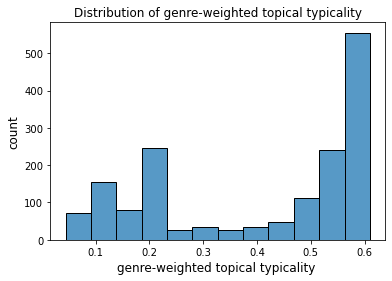

In [19]:
# avg topical typicality plot

sns.histplot(full_songs_df['avg_topical_typ'])
plt.title('Distribution of genre-weighted topical typicality', fontsize=12)
plt.xlabel('genre-weighted topical typicality ', fontsize=12)
plt.ylabel('count', fontsize=12)

Text(0, 0.5, 'count')

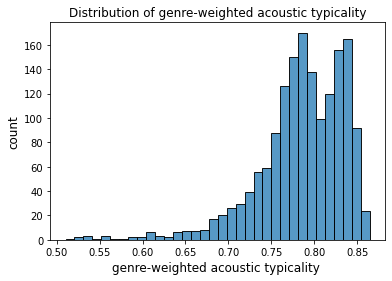

In [20]:
# avg acoustic typicality plot

sns.histplot(full_songs_df['avg_acoustic_typ'])
plt.title('Distribution of genre-weighted acoustic typicality', fontsize=12)
plt.xlabel('genre-weighted acoustic typicality ', fontsize=12)
plt.ylabel('count', fontsize=12)

In [21]:
# write to csv
full_songs_df.to_csv('Data/spotify_sg_songs_final_6.csv', index=False)